In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
titanic_data= pd.read_csv('https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.value_counts().head()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
dtype: int64

In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_df = titanic_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_df['gender'] = pd.get_dummies(titanic_df['Sex'], drop_first=True)
titanic_df.drop(['Sex', 'Age'],axis=1, inplace=True)

In [11]:
X = titanic_df.iloc[:, 1:].values
y= titanic_df.iloc[:, 0].values
print(X[:5])
print(y[:5])

[[ 3.      7.25    1.    ]
 [ 1.     71.2833  0.    ]
 [ 3.      7.925   0.    ]
 [ 1.     53.1     0.    ]
 [ 3.      8.05    1.    ]]
[0 1 1 1 0]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [27]:
#GuassianNB
model=GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9304703476482618

In [14]:
predict_y= model.predict(X_test)
prob = pd.DataFrame(model.predict_proba(X_test))
result= pd.DataFrame({'Actual':y_test, 'Predicted': predict_y, 'Probability_not_survived(%)': round(prob.iloc[:, 0]*100, 2), 'Probability_survived(%)': round(prob.iloc[:, 1]*100, 2)})
result

,Actual,Predicted,Probability_not_survived(%),Probability_survived(%)
0,1,0,95.91,4.09
1,0,0,91.33,8.67
2,0,0,95.88,4.12
3,1,1,0.00,100.00
4,0,0,95.91,4.09
...,...,...,...,...
174,0,0,95.91,4.09
175,0,0,95.91,4.09
176,1,1,42.68,57.32
177,0,0,95.91,4.09


In [15]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 
model= [GaussianNB(), BernoulliNB(), MultinomialNB()]
for i in model:
    i.fit(X_train, y_train)
    predict_y= i.predict(X_test)
    print(i, '*****************')
    print(confusion_matrix(y_test, predict_y))
    print(classification_report(y_test, predict_y))
    print('************************************************\n')

GaussianNB() *****************
[[96 15]
 [17 51]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       111
           1       0.77      0.75      0.76        68

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

************************************************

BernoulliNB() *****************
[[98 13]
 [21 47]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       111
           1       0.78      0.69      0.73        68

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

************************************************

MultinomialNB() *****************
[[99 12]
 [37 31]]
              precision    recall  f1-score   support

           0       0.73      0.89    

In [16]:
from sklearn.datasets import load_digits
img_dataset= load_digits()
img_dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [17]:
X= img_dataset.data
y= img_dataset.target

In [18]:
df = pd.DataFrame(X)
print(df.shape)
df.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.85, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1527, 64) (270, 64) (1527,) (270,)


In [28]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train, y_train)
predict_y= model.predict(X_test)
print('Test score: ', model.score(X_test, y_test))
pd.DataFrame({'Actual': y_test, 'Predicted' : predict_y})

Test score:  0.9100204498977505


,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
484,0,1
485,0,0
486,0,0
487,0,1


In [21]:
print('Classification report: \n',classification_report(y_test, predict_y))


Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.93      1.00      0.96        25
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        28
           5       1.00      1.00      1.00        28
           6       1.00      0.97      0.98        31
           7       1.00      1.00      1.00        28
           8       0.95      0.95      0.95        22
           9       1.00      1.00      1.00        26

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



In [22]:
from sklearn.datasets import load_breast_cancer
B_cancer = load_breast_cancer()
B_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
X = B_cancer.data
y = B_cancer.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80)

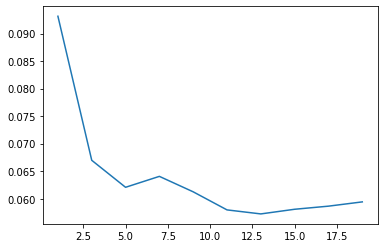

In [29]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
error_B =[]
for i in range(1,20, 2):
    Knn_B = KNeighborsRegressor(n_neighbors=i)
    y_pred = cross_val_predict(Knn_B, X, y, cv=5)
    error_B.append(mean_squared_error(y, y_pred))
plt.plot(range(1,20, 2),error_B)

In [25]:
training_score=[]
test_score=[]
MSE = []
for i in range(1, 15, 2):
    KNN_cls= KNeighborsClassifier(n_neighbors=i, p=2)
    KNN_cls.fit(X_train, y_train)
    predict_y= KNN_cls.predict(X_test)
    MSE.append(mean_squared_error(y_test, predict_y))
    training_score.append(KNN_cls.score(X_train, y_train))
    test_score. append(KNN_cls.score(X_test, y_test))

Data_f = pd.DataFrame({'With_k value': (range(1, 15, 2)), 'Training_accuracy': training_score, 'Test_accuracy': test_score})
Data_f

,With_k value,Training_accuracy,Test_accuracy
0,1,1.0000,0.905930
1,3,0.9125,0.922290
2,5,0.9250,0.910020
3,7,0.9250,0.899796
4,9,0.9250,0.899796
5,11,0.9000,0.889571
6,13,0.9000,0.887526


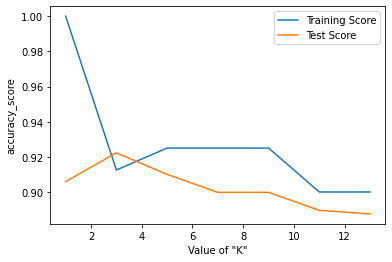

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,15,2), training_score, label='Training Score')
plt.plot(range(1,15,2), test_score, label='Test Score')
plt.xlabel('Value of "K"')
plt.ylabel('accuracy_score')
plt.legend()


In [32]:
#SVC
from sklearn.datasets import load_breast_cancer
B_cancer = load_breast_cancer()

No. of different classes : [0 1]
0.9876977152899824
Classification report: 
               precision    recall  f1-score   support

   malignant       1.00      0.97      0.98       212
      benign       0.98      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569

[[205   7]
 [  0 357]]


Text(0.5, 0, 'Predict')

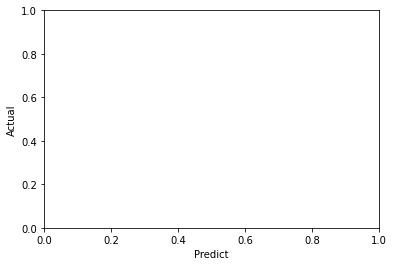

In [35]:
X = B_cancer.data
y = B_cancer.target

sc=StandardScaler()
X=sc.fit_transform(X)
from sklearn.svm import SVC
svc=SVC()
svc.fit(X,y)


print('No. of different classes :', svc.classes_)
print(svc.score(X,y))
pred_y= svc.predict(X)
print('Classification report: \n', classification_report(y, pred_y, target_names=(['malignant','benign'])))
print(confusion_matrix(y, pred_y))
plt.ylabel('Actual')
plt.xlabel('Predict')

Best parameters:  {'C': 100, 'kernel': 'linear'}
No. of different classes : [0 1]
0.9972067039106145
Classification report: 
               precision    recall  f1-score   support

   malignant       1.00      0.99      1.00       212
      benign       0.99      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

[[210   2]
 [  0 357]]


Text(0.5, 0, 'Predict')

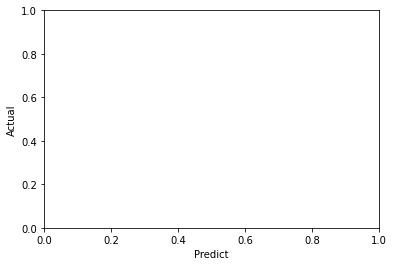

In [40]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
X = B_cancer.data
y = B_cancer.target

sc=StandardScaler()
X=sc.fit_transform(X)
model= SVC(kernel='linear',C=100)
param ={'kernel': ['linear', 'polynomial', 'RBF', 'sigmoid'], 'C': [50, 100]}
svc=GridSearchCV(model, param_grid=param, scoring='f1', cv=3)
svc.fit(X,y)
print('Best parameters: ', svc.best_params_)


print('No. of different classes :', svc.classes_)
print(svc.score(X,y))
pred_y= svc.predict(X)
print('Classification report: \n', classification_report(y, pred_y, target_names=(['malignant','benign'])))
print(confusion_matrix(y, pred_y))
plt.ylabel('Actual')
plt.xlabel('Predict')

In [41]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
boston= load_boston()
X= boston.data
y= boston.target

sc=StandardScaler()
sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.1,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
svr= SVR(kernel='linear')
svr.fit(X_train,y_train)
print(f"Training score --->  {svr.score(X_train, y_train)}")
print(f"Testing score --->  {svr.score(X_test, y_test)}")
y_pred= svr.predict(X_test)

df = pd.DataFrame(data= {'Actual_price': y_test, 'Predict_price': y_pred})
df['residual']= df["Actual_price"]-df["Predict_price"]
df.head()

(455, 13) (51, 13) (455,) (51,)
Training score --->  0.6967429898129334
Testing score --->  0.779800153768055


,Actual_price,Predict_price,residual
0,23.6,26.323106,-2.723106
1,32.4,32.996284,-0.596284
2,13.6,13.819763,-0.219763
3,22.8,23.943603,-1.143603
4,16.1,18.492351,-2.392351
